[*********************100%%**********************]  1 of 1 completed


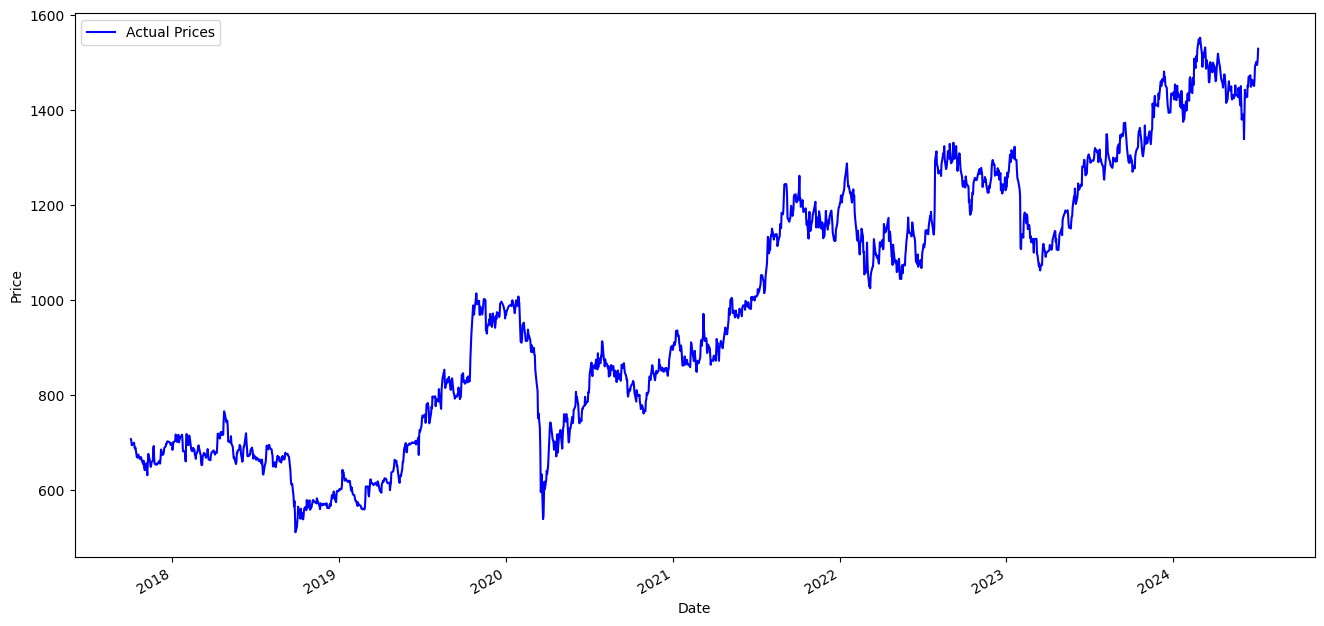

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-03,735.000000,740.000000,701.700012,707.549988,696.950378,35367877
2017-10-04,710.150024,710.750000,699.000000,703.650024,693.108887,3613280
2017-10-05,704.549988,704.549988,686.099976,694.549988,684.145203,2680742
2017-10-06,693.900024,702.000000,689.000000,696.750000,686.312317,1416485
2017-10-09,694.099976,702.500000,694.099976,698.650024,688.183838,951473
...,...,...,...,...,...,...
2024-07-01,1491.949951,1511.900024,1481.900024,1501.849976,1501.849976,788569
2024-07-02,1507.000000,1510.349976,1468.099976,1494.900024,1494.900024,1462260
2024-07-03,1503.000000,1506.949951,1486.199951,1496.349976,1496.349976,527776


In [5]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'SBILIFE.NS'  
df = yf.download(ticker)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Close'], color='blue', label='Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()
df

In [38]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .85 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(256, return_sequences=False))
model.add(Dense(128))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=15)

[array([0.18824148, 0.18449494, 0.17575289, 0.17786636, 0.17969164,
       0.18098851, 0.17128586, 0.16917239, 0.17109371, 0.15226472,
       0.15509868, 0.15063165, 0.15706803, 0.14813389, 0.14818191,
       0.15207264, 0.14914257, 0.14467554, 0.13775877, 0.14457944])]
[0.1301215006773263]

[array([0.18824148, 0.18449494, 0.17575289, 0.17786636, 0.17969164,
       0.18098851, 0.17128586, 0.16917239, 0.17109371, 0.15226472,
       0.15509868, 0.15063165, 0.15706803, 0.14813389, 0.14818191,
       0.15207264, 0.14914257, 0.14467554, 0.13775877, 0.14457944]), array([0.18449494, 0.17575289, 0.17786636, 0.17969164, 0.18098851,
       0.17128586, 0.16917239, 0.17109371, 0.15226472, 0.15509868,
       0.15063165, 0.15706803, 0.14813389, 0.14818191, 0.15207264,
       0.14914257, 0.14467554, 0.13775877, 0.14457944, 0.1301215 ])]
[0.1301215006773263, 0.1259906705543803]

Epoch 1/15
140/140 [==============================] - 52s 250ms/step - loss: 0.0032
Epoch 2/15
140/140 [====================

In [39]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

44/44 [==============================] - 10s 89ms/step


0.9949226173353807

In [40]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

8/8 [==============================] - 2s 190ms/step


0.9172505841392933

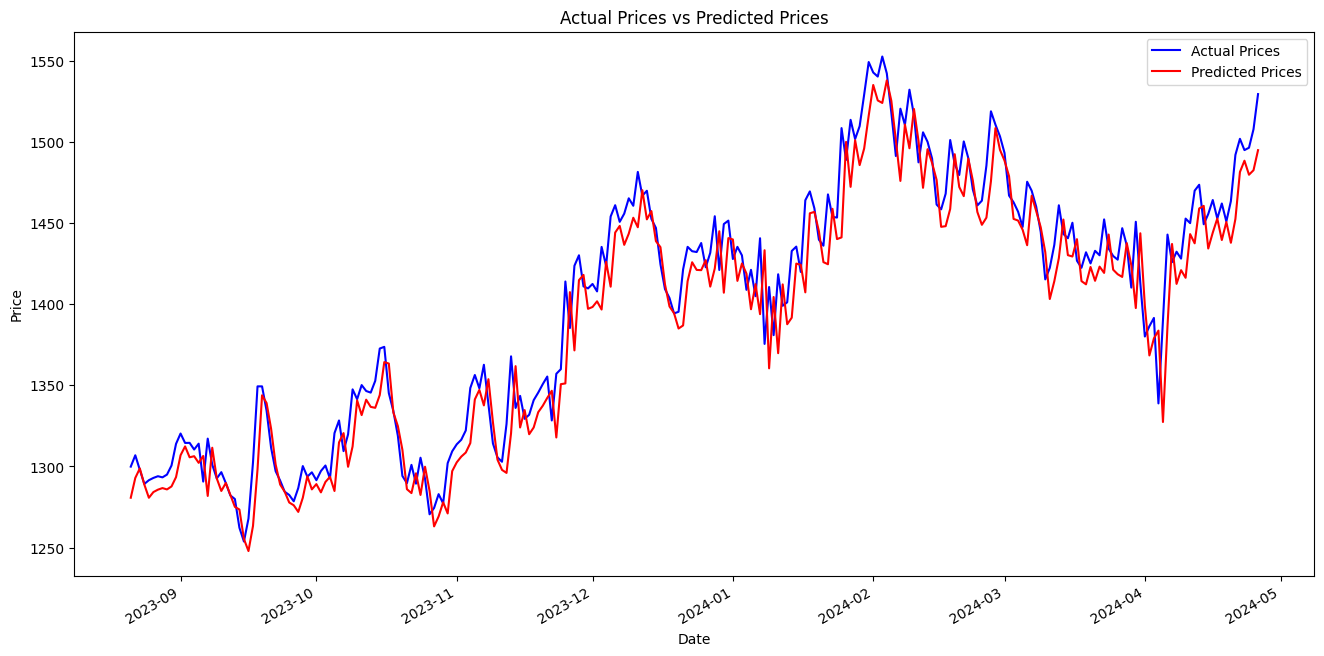

In [41]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [42]:
import joblib


model_file_path = '35.joblib'
scaler_file_path = 'scaler35.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 35.joblib
Scaler saved to scaler35.joblib
